In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt


In [78]:
class DerivadaNN(nn.Module):
    def __init__(self):
        super(DerivadaNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 64), # Camada de entrada -> oculta (64 neurônios)
            nn.Tanh(),
            nn.Linear(64, 64), # Oculta -> oculta
            nn.Tanh(),
            nn.Linear(64, 64), # Oculta -> saída
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 64), # Oculta -> saída
            nn.Tanh(),
            nn.Linear(64, 64),
            nn.Tanh(),
            nn.Linear(64, 1)
            )
    def forward(self, x):
        return self.model(x)

In [79]:
# Instancia o modelo e define a função de perda e otimizador
model = DerivadaNN()
criterion = nn.MSELoss() # Erro quadrático médio
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [80]:
# Loop de treinamento por 20000 épocas
for epoch in range(500):
    p = np.random.randint(1, 11) # Expoente aleatório entre 1 e 10
    x = np.random.uniform(0, 2*np.pi, 256).reshape(-1, 1).astype(np.float32)
    y = p * x**(p - 1) # Derivada analítica da função x^p

In [81]:
x_tensor = torch.from_numpy(x ** p) # Entrada para o modelo
y_tensor = torch.from_numpy(y) # Saída esperada (derivada)

In [82]:
optimizer.zero_grad() # Zera os gradientes
output = model(x_tensor) # Forward pass
loss = criterion(output, y_tensor) # Calcula a perda
loss.backward() # Backpropagation
optimizer.step() # Atualiza os pesos

In [83]:
# Teste com função seno: a rede deve estimar o cosseno
model.eval()
x_test = np.linspace(0, 2 * np.pi, 100).reshape(-1, 1).astype(np.float32)
y_true = np.cos(x_test) # Derivada real de sin(x)
x_test_tensor = torch.from_numpy(np.sin(x_test)) # Entrada: sin(x)
with torch.no_grad():
    y_pred = model(x_test_tensor) # Previsão da rede

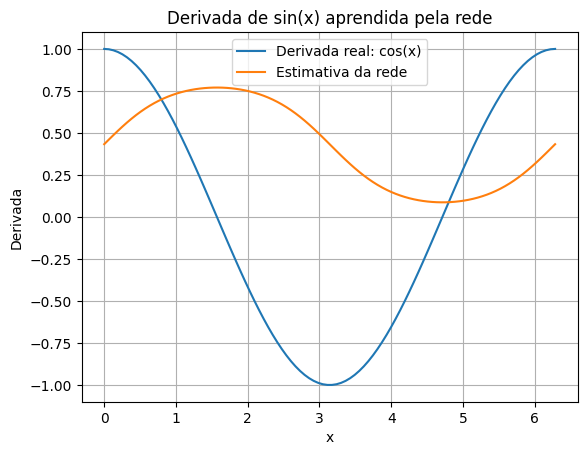

In [ ]:
# Visualização dos resultados
plt.plot(x_test, y_true, label='Derivada real: cos(x)')
plt.plot(x_test, y_pred.numpy(), label='Estimativa da rede')
plt.legend()
plt.title('Derivada de sin(x) aprendida pela rede')
plt.xlabel('x')
plt.ylabel('Derivadas')
plt.grid(True)
plt.show()